<h1>Football Win Predictor</h1>

In [38]:
# import packages and set themes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [39]:
# reading csv's
#prem league
dfp_2022  =  pd.read_csv('data/E2022.csv', skip_blank_lines=True)
dfp_2021  =  pd.read_csv('data/E2021.csv', skip_blank_lines=True)
dfp_2020  =  pd.read_csv('data/E2020.csv', skip_blank_lines=True)
dfp_2019  =  pd.read_csv('data/E2019.csv', skip_blank_lines=True)
#champions league
dfc_2022  =  pd.read_csv('data/E1_c2022.csv', skip_blank_lines=True)
dfc_2021 =  pd.read_csv('data/E1_c2021.csv', skip_blank_lines=True)
dfc_2020 =  pd.read_csv('data/E1_c2020.csv', skip_blank_lines=True)
dfc_2019 =  pd.read_csv('data/E1_c2019.csv', skip_blank_lines=True)
#league 1
dfl1_2022 =  pd.read_csv('data/E2_l12022.csv', skip_blank_lines=True)
dfl1_2021 =  pd.read_csv('data/E2_l12021.csv', skip_blank_lines=True)
dfl1_2020 =  pd.read_csv('data/E2_l12020.csv', skip_blank_lines=True)
dfl1_2019 =  pd.read_csv('data/E2_l12019.csv', skip_blank_lines=True)
#league 2
dfl2_2022 =  pd.read_csv('data/E3_l22022.csv', skip_blank_lines=True)
dfl2_2021 =  pd.read_csv('data/E3_l22021.csv', skip_blank_lines=True)
dfl2_2020 =  pd.read_csv('data/E3_l22020.csv', skip_blank_lines=True)
dfl2_2019 =  pd.read_csv('data/E3_l22019.csv', skip_blank_lines=True)

### STEP 1: Clean the columns and rows which are N/A

For Premier and Champions league we removed the columns with N/A values as we checked there were over 106 columns and as we were not using all of them hence, removed a few of them here.

In [40]:
dfp_list = [dfp_2022 , dfp_2021, dfp_2020, dfp_2019]
dfp = pd.concat(dfp_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df

column_remove_list = dfp.columns[dfp.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfp_clean = remove_col(dfp,column_remove_list) 
print(column_remove_list)
dfp_clean

['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'IWCH', 'IWCD', 'IWCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.91,2.08,1.76,0.50,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,3.00,1.47,2.73,1.75,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.81,2.10,1.76,0.50,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.96,1.96,1.87,-0.25,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.97,1.94,1.89,-1.00,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.16,1.80,2.03,0.50,1.88,2.05,1.94,2.05,1.86,2.02
1422,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,6.82,1.13,5.77,-3.75,2.01,1.88,2.06,1.88,2.02,1.84
1423,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.51,1.57,2.40,1.00,1.95,1.97,2.03,2.00,1.95,1.92
1424,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.11,1.82,2.01,-0.50,2.00,1.93,2.03,1.96,1.98,1.89


In [41]:
dfc_list = [dfc_2022 , dfc_2021, dfc_2020, dfc_2019]
dfc = pd.concat(dfc_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove the specified column list
    return df

column_remove_list = dfc.columns[dfc.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfc_clean = remove_col(dfc,column_remove_list) 
print(column_remove_list)
dfc_clean

['IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'BWCH', 'BWCD', 'BWCA', 'PSCH', 'PSCD', 'PSCA', 'PC>2.5', 'PC<2.5', 'PCAHH', 'PCAHA']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E1,29/07/2022,20:00,Huddersfield,Burnley,0,1,A,0,1,...,1.70,2.28,1.63,0.00,2.09,1.81,2.14,1.83,2.09,1.78
1,E1,30/07/2022,15:00,Blackburn,QPR,1,0,H,1,0,...,1.96,1.94,1.86,-0.50,1.99,1.91,2.01,1.95,1.97,1.88
2,E1,30/07/2022,15:00,Blackpool,Reading,1,0,H,1,0,...,1.89,1.99,1.82,-0.50,2.08,1.82,2.11,1.86,2.04,1.82
3,E1,30/07/2022,15:00,Cardiff,Norwich,1,0,H,0,0,...,1.81,2.13,1.71,0.25,2.01,1.89,2.03,2.00,1.95,1.89
4,E1,30/07/2022,15:00,Hull,Bristol City,2,1,H,0,1,...,1.78,2.11,1.73,-0.25,2.10,1.70,2.17,1.81,2.09,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,E1,22/07/2020,19:30,Nott'm Forest,Stoke,1,4,A,0,1,...,1.81,2.06,1.76,-0.25,2.01,1.89,2.02,1.95,1.96,1.89
2175,E1,22/07/2020,19:30,Reading,Swansea,1,4,A,1,1,...,2.29,1.68,2.18,0.50,1.90,2.00,1.95,2.06,1.88,1.96
2176,E1,22/07/2020,19:30,Sheffield Weds,Middlesbrough,1,2,A,1,1,...,2.04,1.87,1.93,0.00,1.82,2.08,1.83,2.14,1.79,2.07
2177,E1,22/07/2020,19:30,West Brom,QPR,2,2,D,1,1,...,2.78,1.48,2.61,-1.75,1.93,1.97,1.95,2.00,1.92,1.94


For <b>League1 and League2</b>, as they're not well known hence, have a few matches with no betting odds.Therefore, we cleaned the data using row deletion as it there were a few rows which were not having any betting odds which would be used further in our visualisation and models

In [42]:
dfl1_list = [dfl1_2022 , dfl1_2021, dfl1_2020, dfl1_2019]
dfl1 = pd.concat(dfl1_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df

column_remove_list = dfl1.columns[dfl1.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfl1_clean = remove_col(dfl1,column_remove_list) 
print(column_remove_list)
# dfl1_clean

['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA']


In [43]:
dfl2_list = [dfl2_2022 , dfl2_2021, dfl2_2020, dfl2_2019]
dfl2 = pd.concat(dfl2_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df

column_remove_list = dfl2.columns[dfl2.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfl2_clean = remove_col(dfl2,column_remove_list) 
print(column_remove_list)
# dfl2_clean

['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA']


### STEP 2: Concatenating all the Leagues
Concatenating all leagues datasets and removing any additional unwanted columns from all the leagues.
Given is the column list which are removed as they will both not be used for our visualisation, model and are also corrupting our dataframe with null values 

In [44]:
df_list = [dfp_clean , dfc_clean, dfl1_clean, dfl2_clean]
df = pd.concat(df_list,ignore_index = True)
def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df

column_remove_list = df.columns[df.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
df_clean = remove_col(df,column_remove_list) 
print(column_remove_list)
df_clean

['IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'BWCH', 'BWCD', 'BWCA', 'PSCH', 'PSCD', 'PSCA', 'PCAHH', 'PCAHA', 'IWCH', 'IWCD', 'IWCA', 'B365CAHH', 'B365CAHA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'PC>2.5', 'PC<2.5']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365C<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.72,2.19,1.91,2.08,1.76,0.50,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.62,1.51,3.00,1.47,2.73,1.75,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.72,2.24,1.81,2.10,1.76,0.50,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.95,2.09,1.96,1.96,1.87,-0.25,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.96,2.06,1.97,1.94,1.89,-1.00,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,0,1,...,1.85,2.01,1.90,1.95,1.83,-0.50,2.01,1.95,1.96,1.86
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,1,0,...,1.75,2.11,1.83,2.03,1.76,-0.25,1.89,2.10,1.82,2.00
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,0,1,...,1.65,2.27,1.75,2.16,1.67,-0.50,1.95,2.02,1.88,1.94
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,1,0,...,1.75,2.10,1.83,2.03,1.76,0.25,1.85,2.12,1.78,2.06


### STEP 3: Making subsets of dataframe for betting odds, match stats and others

Most influential betting odds's subset

In [45]:
betodds_list = ['Div','Date','Time','HomeTeam','AwayTeam','FTHG','FTAG','FTR','B365H','B365D','B365A','AvgH','AvgD','AvgA']
betodds = df_clean.loc[:,betodds_list]
betodds

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AvgH,AvgD,AvgA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,4.20,3.60,1.85,4.39,3.59,1.88
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,11.00,6.00,1.25,10.99,6.05,1.28
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,3.75,3.50,2.00,3.80,3.50,2.04
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,2.25,3.40,3.20,2.34,3.34,3.18
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,1.66,3.80,5.25,1.67,3.80,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,1.90,3.60,3.90,1.93,3.47,3.84
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,2.00,3.30,4.00,1.99,3.42,3.69
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,1.72,4.00,4.40,1.71,3.86,4.48
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,3.10,3.25,2.37,2.91,3.22,2.42


All the available match stats's subset

# CODE for half time dataset

In [109]:
df_matchstats = df_clean[df_clean.columns[0:df_clean.columns.get_loc('FTR')+1]]

df_matchstats["FTA"] = df_matchstats["FTHG"] - df_matchstats["FTAG"]

df_half = df_clean[df_clean.columns[0:df_clean.columns.get_loc('HTR')+1]]
df_matchstats = df_matchstats.merge(df_half)
df_matchstats["HTA"] = df_matchstats["HTHG"] - df_matchstats["HTAG"]

df_matchstats["Div"] = df_matchstats["Div"].astype(str)

/var/folders/fw/4k6cqv395n9271k_qmms_nv00000gn/T/ipykernel_54795/3857041042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchstats["FTA"] = df_matchstats["FTHG"] - df_matchstats["FTAG"]


<AxesSubplot:xlabel='HTA', ylabel='FTA'>

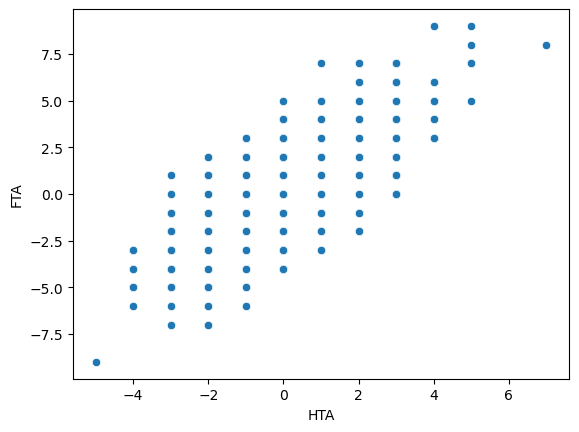

In [110]:
import seaborn as sns 
sns.scatterplot(x = "HTA", y = "FTA", data = df_matchstats)

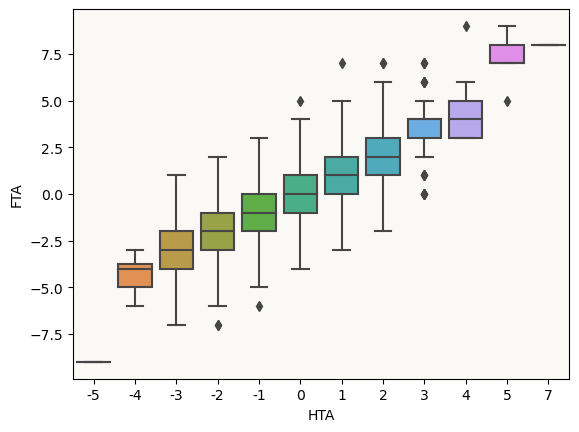

In [111]:
fig, ax = plt.subplots()
sns.boxplot(data=df_matchstats, x="HTA", y="FTA", ax = ax)
ax.set_facecolor("#FAF9F6")

In [112]:
HTA = df_matchstats["HTA"]
FTA = df_matchstats["FTA"]
from scipy.stats import pearsonr
r = np.corrcoef(HTA, FTA)
r

array([[1.        , 0.68620361],
       [0.68620361, 1.        ]])

In [148]:
def corr_HTA_FTA(data):
    df_HTA = data["HTA"]
    df_FTA = data["FTA"] 
    r = pearsonr(df_HTA, df_FTA)
    return r

In [163]:
df_E0 = df_matchstats.query("Div == 'E0'")
corr_HTA_FTA(df_E0).statistic

0.7100047919095597

In [164]:
df_E1 = df_matchstats.query("Div == 'E1'")
corr_HTA_FTA(df_E1).statistic

0.663229818056817

In [152]:
df_E2 = df_matchstats.query("Div == 'E2'")
corr_HTA_FTA(df_E2)

PearsonRResult(statistic=0.6964652695473834, pvalue=2.946589428925318e-288)

In [153]:
df_E3 = df_matchstats.query("Div == 'E3'")
corr_HTA_FTA(df_E3)

PearsonRResult(statistic=0.6793553041975144, pvalue=1.224720939171981e-274)

In [162]:
df_E0_half = df_E0.query("HTA > 0")
len(df_E0_half.query("FTA > 0"))*100/len(df_E0_half)

77.68595041322314